## Parte 2: Do It Yourself!

Regras de Negócio:

- Aparência: Sol, Nublado, Chuva
- Temperatura: -130 ~ 130 ºF
- Umidade: 0 ~ 100%
- Jogar: Sim/Não
- Tratar todos valores NA

In [36]:
import pandas as pd
import seaborn as sns
import statistics as sts

df = pd.read_csv("data/tempo.csv", sep=";")
df.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [37]:
df.shape

(14, 5)

In [38]:
group = df.groupby(["Aparencia"]).size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [39]:
df.loc[df["Aparencia"] == "menos"]

,Aparencia,Temperatura,Umidade,Vento,Jogar
6,menos,64,65.0,VERDADEIRO,sim


In [40]:
# Retirando todas as aparições de "menos"
df.loc[df["Aparencia"] == "menos", "Aparencia"] = "sol"

# Rechecagem
df.loc[df["Aparencia"] == "menos"]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [41]:
df["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

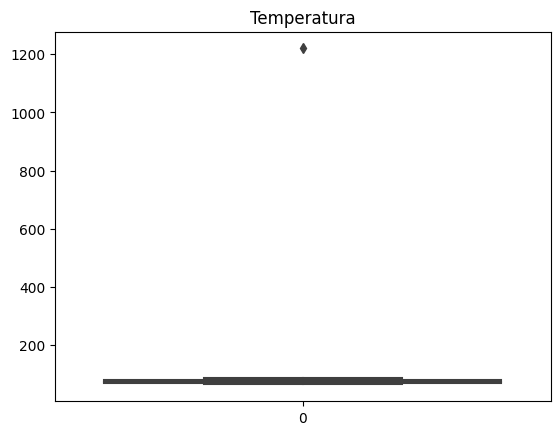

In [42]:
sns.boxplot(df["Temperatura"]).set_title("Temperatura")

In [43]:
# Mostra todos os valores indesejaveis
df.loc[(df["Temperatura"] < -130) | (df["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [44]:
# Calcula a mediana
median = sts.median(df["Temperatura"])
print("Mediana: " , median)

# Muda todos os valores pela mediana
df.loc[(df["Temperatura"] < -130) | (df["Temperatura"] > 130), "Temperatura"] = median 

# Rechecagem
df.loc[(df["Temperatura"] < -130) | (df["Temperatura"] > 130)]

Mediana:  73.5


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [45]:
# Checa todos os nulos
agrupado = df.isnull().sum()
print(agrupado)



Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64


In [46]:
# Maior ocorrência de vento
group = df.groupby(["Vento"]).size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [47]:
# Mediana e Substituir de Umidade
median = sts.median(df["Umidade"])
print("Mediana Umidade: ", median)

df["Umidade"].fillna(median, inplace=True)

# Substituir de Vento
df["Vento"].fillna("FALSO", inplace=True)

agrupado = df.isnull().sum()
agrupado

Mediana Umidade:  85.5


Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [48]:
group = df.groupby(["Jogar"]).size()
group

Jogar
nao    5
sim    9
dtype: int64

In [49]:
# Umidade maior que 100 ou menor que 0
df.loc[(df["Umidade"] < 0) | (df["Umidade"] > 100)] 

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [50]:
# Mediana
median = sts.median(df["Umidade"])
print("Mediana Umidade: ", median)

# Substituir
df.loc[(df["Umidade"] < 0) | (df["Umidade"] > 100), "Umidade"] = median

# Rechecagem
df.loc[(df["Umidade"] < 0) | (df["Umidade"] > 100)] 

Mediana Umidade:  85.25


,Aparencia,Temperatura,Umidade,Vento,Jogar


In [51]:
df

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.00,FALSO,nao
1,sol,80.0,90.00,VERDADEIRO,nao
2,nublado,83.0,86.00,FALSO,sim
3,chuva,70.0,85.50,FALSO,sim
4,chuva,68.0,80.00,FALSO,sim
5,chuva,65.0,70.00,VERDADEIRO,nao
6,sol,64.0,65.00,VERDADEIRO,sim
7,sol,73.5,95.00,FALSO,nao
8,sol,69.0,70.00,FALSO,sim
9,chuva,75.0,85.25,FALSO,sim


In [52]:
print("Hell Yeah, Nailed It! >:3")

Hell Yeah, Nailed It! >:3
